# **Importing Libraries**

In [61]:
import pandas as pd
#%pip install seaborn
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

#import linear model
from sklearn.linear_model import LinearRegression

#import metrics
from sklearn.metrics import r2_score, root_mean_squared_error
from sklearn.model_selection import TimeSeriesSplit

# **Importing Data**

In [2]:
# Mount Google Drive
#from google.colab import drive
#drive.mount('/content/drive')
file_path = './data_store_sales/'

## Items

In [3]:
# Load the items CSV files into pandas DataFrames
df_items = pd.read_csv(file_path+'items.csv')

print('The items shape is',df_items.shape)
print(df_items.info())
print('\nvalue_counts\n', df_items.nunique())
print('\nnull value\n',df_items.isnull().sum())
df_items.head(5)


The items shape is (4100, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4100 entries, 0 to 4099
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   item_nbr    4100 non-null   int64 
 1   family      4100 non-null   object
 2   class       4100 non-null   int64 
 3   perishable  4100 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 128.3+ KB
None

value_counts
 item_nbr      4100
family          33
class          337
perishable       2
dtype: int64

null value
 item_nbr      0
family        0
class         0
perishable    0
dtype: int64


,item_nbr,family,class,perishable
0,96995,GROCERY I,1093,0
1,99197,GROCERY I,1067,0
2,103501,CLEANING,3008,0
3,103520,GROCERY I,1028,0
4,103665,BREAD/BAKERY,2712,1


## Stores

In [4]:
# Load the stores CSV files into pandas DataFrames
df_stores = pd.read_csv(file_path+'stores.csv')
print('The items shape is',df_stores.shape)
print(df_stores.info())
print('\nvalue_counts\n', df_stores.nunique())
print('\nnull value\n',df_stores.isnull().sum())
df_stores.head(5)

The items shape is (54, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   store_nbr  54 non-null     int64 
 1   city       54 non-null     object
 2   state      54 non-null     object
 3   type       54 non-null     object
 4   cluster    54 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 2.2+ KB
None

value_counts
 store_nbr    54
city         22
state        16
type          5
cluster      17
dtype: int64

null value
 store_nbr    0
city         0
state        0
type         0
cluster      0
dtype: int64


,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


## Transactions

In [5]:
# Load the transactions CSV files into pandas DataFrames
df_transactions = pd.read_csv(file_path+'transactions.csv')
print('The items shape is',df_transactions.shape)
print(df_transactions.info())
print('\nvalue_counts\n', df_transactions.nunique())
print('\nnull value\n',df_transactions.isnull().sum())
df_transactions.head(5)


The items shape is (83488, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83488 entries, 0 to 83487
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          83488 non-null  object
 1   store_nbr     83488 non-null  int64 
 2   transactions  83488 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.9+ MB
None

value_counts
 date            1682
store_nbr         54
transactions    4993
dtype: int64

null value
 date            0
store_nbr       0
transactions    0
dtype: int64


,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


## Oil

In [6]:
# Load the oil CSV files into pandas DataFrames
df_oil = pd.read_csv(file_path+'oil.csv')
print('The items shape is',df_oil.shape)
print('\nThe info\n',df_oil.info())
print('\nvalue_counts\n', df_oil.nunique())
print('\nnull value\n',df_oil.isnull().sum())
df_oil.head(5)

The items shape is (1218, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        1218 non-null   object 
 1   dcoilwtico  1175 non-null   float64
dtypes: float64(1), object(1)
memory usage: 19.2+ KB

The info
 None

value_counts
 date          1218
dcoilwtico     998
dtype: int64

null value
 date           0
dcoilwtico    43
dtype: int64


,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


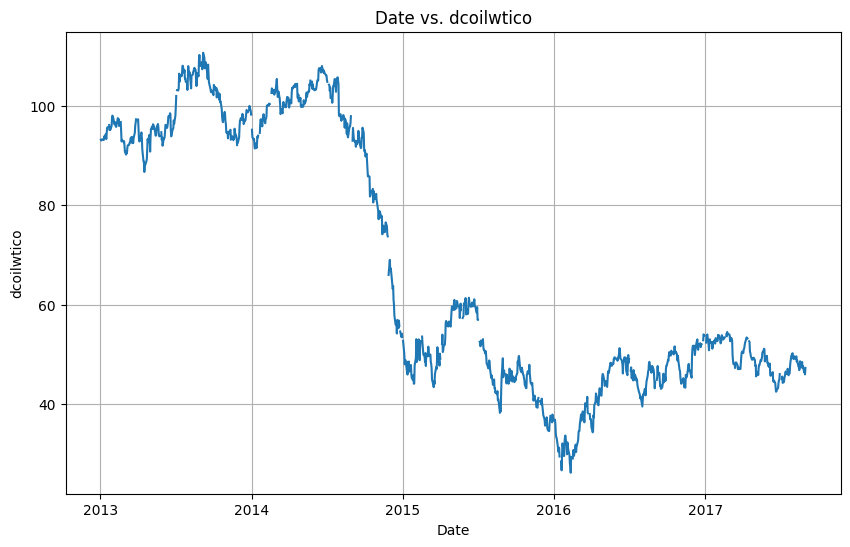

In [7]:
# prompt: plot date vs dcoilwtico from oil dataset

import pandas as pd
import matplotlib.pyplot as plt
# Convert the 'date' column to datetime objects
df_oil['date'] = pd.to_datetime(df_oil['date'])

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(df_oil['date'], df_oil['dcoilwtico'])
plt.xlabel('Date')
plt.ylabel('dcoilwtico')
plt.title('Date vs. dcoilwtico')
plt.grid(True)
plt.show()


## Holidays Event

In [8]:
# Load the holiday_events CSV files into pandas DataFrames
df_holiday = pd.read_csv(file_path+'holidays_events.csv')
print('The items shape is',df_holiday.shape)
print(df_holiday.info())
print('\nvalue_counts\n', df_holiday.nunique())
print('\nnull value\n',df_holiday.isnull().sum())
df_holiday.head(5)

The items shape is (350, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         350 non-null    object
 1   type         350 non-null    object
 2   locale       350 non-null    object
 3   locale_name  350 non-null    object
 4   description  350 non-null    object
 5   transferred  350 non-null    bool  
dtypes: bool(1), object(5)
memory usage: 14.1+ KB
None

value_counts
 date           312
type             6
locale           3
locale_name     24
description    103
transferred      2
dtype: int64

null value
 date           0
type           0
locale         0
locale_name    0
description    0
transferred    0
dtype: int64


,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


## Train

In [9]:
# To make sure we fit RAM avaible on Google-Colab, we will load only part of the file
df_train = pd.read_csv(file_path+'train.csv', nrows=2e6)
print('The items shape is',df_train.shape)
print(df_train.info())
print('\nvalue_counts\n', df_train.nunique())
print('null value\n',df_train.isnull().sum())
df_train.head(5)

The items shape is (2000000, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   item_nbr     int64  
 4   unit_sales   float64
 5   onpromotion  float64
dtypes: float64(2), int64(3), object(1)
memory usage: 91.6+ MB
None

value_counts
 id             2000000
date                50
store_nbr           46
item_nbr          1625
unit_sales       33764
onpromotion          0
dtype: int64
null value
 id                   0
date                 0
store_nbr            0
item_nbr             0
unit_sales           0
onpromotion    2000000
dtype: int64


,id,date,store_nbr,item_nbr,unit_sales,onpromotion
0,0,2013-01-01,25,103665,7.0,NaN
1,1,2013-01-01,25,105574,1.0,NaN
2,2,2013-01-01,25,105575,2.0,NaN
3,3,2013-01-01,25,108079,1.0,NaN
4,4,2013-01-01,25,108701,1.0,NaN


## **Filtering train data for state (Guayas) and only for top 3 families based on items counts**

In [10]:
# Select list of stores located in the 'Pichincha' region
store_ids = df_stores[df_stores['state'] == 'Guayas']['store_nbr'].unique()

# Initialize an empty list to hold filtered chunks
filtered_chunks = []

# Define the chunk size (number of rows per chunk)
chunk_size = 10 ** 6  # Adjust based on your system's memory capacity

# Read the CSV file in chunks
for chunk in pd.read_csv(file_path+'train.csv', chunksize=chunk_size):
    #print(chunk)
    # Filter the chunk for the desired store IDs
    chunk_filtered = chunk[chunk['store_nbr'].isin(store_ids)]
    # Append the filtered chunk to the list
    filtered_chunks.append(chunk_filtered)
    # Optional: Delete the chunk to free up memory
    del chunk

# Concatenate all filtered chunks into a single DataFrame
df_train = pd.concat(filtered_chunks, ignore_index=True)

# Clean up to free memory
del filtered_chunks


/var/folders/hj/bjtkr_b13175_g6c53_yly7c0000gn/T/ipykernel_73348/982235902.py:11: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  for chunk in pd.read_csv(file_path+'train.csv', chunksize=chunk_size):


In [11]:
print('df_train shape',df_train.shape)
df_train

df_train shape (22941656, 6)


,id,date,store_nbr,item_nbr,unit_sales,onpromotion
0,18789,2013-01-02,24,103665,6.0,NaN
1,18790,2013-01-02,24,105574,12.0,NaN
2,18791,2013-01-02,24,105575,2.0,NaN
3,18792,2013-01-02,24,105577,1.0,NaN
4,18793,2013-01-02,24,105693,7.0,NaN
...,...,...,...,...,...,...
22941651,125491520,2017-08-15,51,2123727,2.0,False
22941652,125491521,2017-08-15,51,2123750,3.0,False
22941653,125491522,2017-08-15,51,2123775,1.0,False
22941654,125491523,2017-08-15,51,2123791,1.0,False


In [12]:
print( df_train.info())
print('value_counts\n', df_train.nunique())
print('null value\n',df_train.isnull().sum())
print('unique value\n',df_train.nunique())
print(df_train['onpromotion'].unique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22941656 entries, 0 to 22941655
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   item_nbr     int64  
 4   unit_sales   float64
 5   onpromotion  object 
dtypes: float64(1), int64(3), object(2)
memory usage: 1.0+ GB
None
value_counts
 id             22941656
date               1680
store_nbr            11
item_nbr           4008
unit_sales       109203
onpromotion           2
dtype: int64
null value
 id                   0
date                 0
store_nbr            0
item_nbr             0
unit_sales           0
onpromotion    3980341
dtype: int64
unique value
 id             22941656
date               1680
store_nbr            11
item_nbr           4008
unit_sales       109203
onpromotion           2
dtype: int64
[nan False True]


In [13]:
# Plotting the number of items per family (for top 3 families only)
# Compute the number of items per family and select the top 3 families
items_per_family = df_items['family'].value_counts().reset_index()
items_per_family.columns = ['Family', 'Item Count']
top_3_families = items_per_family.head(3)  # Keep only the top 3 families

The dataset that we have is still very big even after filtering. To prevent our work from unexpected crashes, let's limit the dataset to include only top-3 families by number of items but first let's look at this top-3:

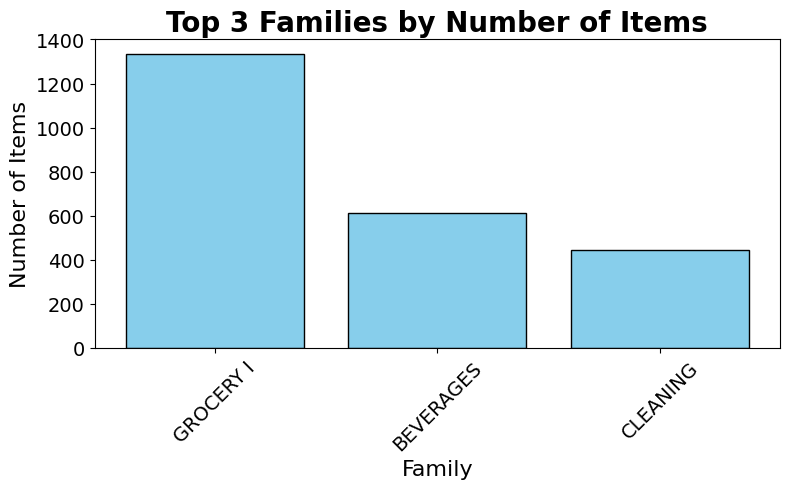

In [14]:
# Plot the top 3 families
plt.figure(figsize=(8, 5))
plt.bar(top_3_families['Family'], top_3_families['Item Count'], color='skyblue', edgecolor='black')
plt.title("Top 3 Families by Number of Items", fontsize=20, fontweight='bold')
plt.xlabel("Family", fontsize=16)
plt.ylabel("Number of Items", fontsize=16)
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)
plt.tight_layout()
# Display the plot
plt.show()

In [15]:
# Now we filter our train data based on top 3 family items count
item_ids = df_items[df_items['family'].isin(top_3_families['Family'].unique())]['item_nbr'].unique()
df_train = df_train[df_train['item_nbr'].isin(item_ids)]
df_train.shape # shape reduced from (22941656, 6) to (14745768, 6)

(14745768, 6)

1. Check for missing values
2. Check for outliers
   1. Handle negative sales
3. Zero sales - include in data frame
4. Feature Engineering
   1. Time-based features
   2. Rolling / Expanding window
5. EDA
   1. Visual EDA
   2. Analyse monthly sales
   3. Analyse holiday impact on sales
   4. and more

# **Preprocessing**

## **1. Dealing with missing values**

In [16]:
# Checking missing values in train
df_train.isnull().sum()

id                   0
date                 0
store_nbr            0
item_nbr             0
unit_sales           0
onpromotion    2747275
dtype: int64

In [17]:
# Focusing on missing values in the 'onpromotion' column in train
df_train['onpromotion'] = df_train['onpromotion'].fillna(False).astype(bool)
df_train['onpromotion'] = df_train['onpromotion'].astype(int)


/var/folders/hj/bjtkr_b13175_g6c53_yly7c0000gn/T/ipykernel_73348/4261340736.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_train['onpromotion'] = df_train['onpromotion'].fillna(False).astype(bool)
/var/folders/hj/bjtkr_b13175_g6c53_yly7c0000gn/T/ipykernel_73348/4261340736.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['onpromotion'] = df_train['onpromotion'].fillna(False).astype(bool)
/var/folders/hj/bjtkr_b13175_g6c53_yly7c0000gn/T/ipykernel_73348/4261340736.py:3: SettingWithCopyWarning: 
A value is trying t

In [18]:
df_train['onpromotion'].value_counts()

onpromotion
0    14066471
1      679297
Name: count, dtype: int64

In [19]:
df_train

,id,date,store_nbr,item_nbr,unit_sales,onpromotion
1,18790,2013-01-02,24,105574,12.0,0
2,18791,2013-01-02,24,105575,2.0,0
3,18792,2013-01-02,24,105577,1.0,0
4,18793,2013-01-02,24,105693,7.0,0
5,18794,2013-01-02,24,105737,17.0,0
...,...,...,...,...,...,...
22941650,125491519,2017-08-15,51,2122188,1.0,0
22941651,125491520,2017-08-15,51,2123727,2.0,0
22941652,125491521,2017-08-15,51,2123750,3.0,0
22941653,125491522,2017-08-15,51,2123775,1.0,0


In [20]:
# Filling null value using linear interpolation  method for oil price in oil dataset
df_oil['dcoilwtico'] = df_oil['dcoilwtico'].interpolate(method='linear', limit_direction='both')
df_oil.isnull().sum()


date          0
dcoilwtico    0
dtype: int64

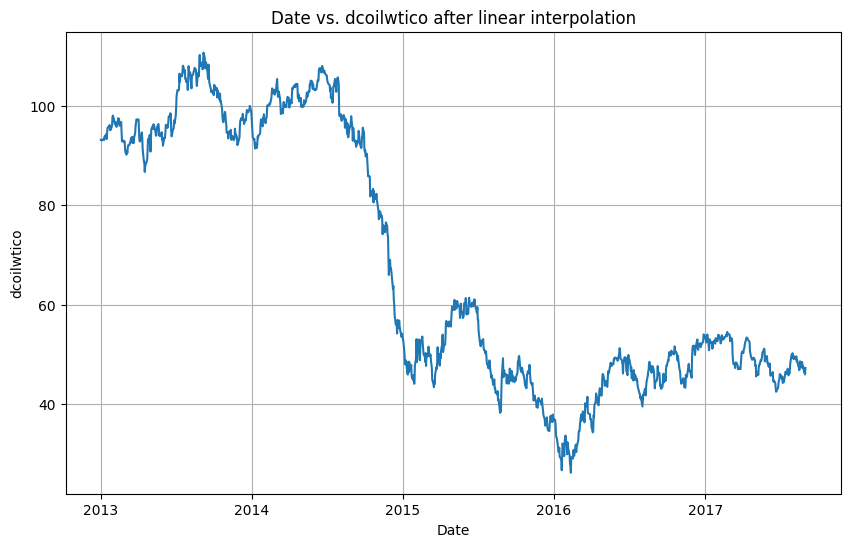

In [21]:
# prompt: plot date vs dcoilwtico from oil dataset

import pandas as pd
import matplotlib.pyplot as plt
# Convert the 'date' column to datetime objects
df_oil['date'] = pd.to_datetime(df_oil['date'])

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(df_oil['date'], df_oil['dcoilwtico'])
plt.xlabel('Date')
plt.ylabel('dcoilwtico')
plt.title('Date vs. dcoilwtico after linear interpolation')
plt.grid(True)
plt.show()


## **2. Checking Negative Sales**

In [22]:
# Checking for negative sales (returns to store)
negative_sales = df_train[df_train['unit_sales'] < 0]
print('The number of negative sales is',len(negative_sales))

negative_sales.head()  # Viewing negative sales for analysis

The number of negative sales is 794


,id,date,store_nbr,item_nbr,unit_sales,onpromotion
18589,106658,2013-01-04,34,586824,-2.0,0
54236,309805,2013-01-09,35,1079215,-8.0,0
64452,382905,2013-01-11,27,1097187,-20.0,0
96414,564108,2013-01-15,51,627885,-36.0,0
132903,787522,2013-01-21,24,211205,-5.0,0


In [23]:
# Replace negative 'unit_sales' values with 0
df_train['unit_sales'] = df_train['unit_sales'].apply(lambda x: 0 if x < 0 else x)
df_train[df_train['unit_sales'] < 0]


/var/folders/hj/bjtkr_b13175_g6c53_yly7c0000gn/T/ipykernel_73348/2651562614.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['unit_sales'] = df_train['unit_sales'].apply(lambda x: 0 if x < 0 else x)


,id,date,store_nbr,item_nbr,unit_sales,onpromotion


## **3. Outlier Analysis**

In [24]:
# prompt: group by store_nbr and item_nbr in train dataset

# Group by 'store_nbr' and 'item_nbr'
grouped_train = df_train.groupby(['store_nbr', 'item_nbr'])

# Example: Calculate the sum of 'unit_sales' for each group
sales_mean = grouped_train['unit_sales'].mean()
sales_mean



store_nbr  item_nbr
24         96995        1.918552
           99197        2.138462
           103520       4.683254
           105574      11.045609
           105575       8.413910
                         ...    
51         2123727      1.500000
           2123750      3.000000
           2123775      1.000000
           2123791      1.000000
           2127114      5.625000
Name: unit_sales, Length: 20788, dtype: float64

In [25]:
# Function to calculate Z-score for each group (store-item combination)
def calculate_zscore_store_item(group):
    mean_sales = group['unit_sales'].mean()
    std_sales = group['unit_sales'].std()
    # Calculate Z-score (avoiding division by zero for standard deviation)

    group['z_scores'] = (group['unit_sales'] - mean_sales) / (std_sales if std_sales !=0 else 1)
    return group

In [26]:
df_train_grouped = df_train.groupby(['store_nbr', 'item_nbr']).apply(calculate_zscore_store_item)
df_train_grouped.reset_index(drop=True, inplace=True)
df_train_grouped.head()

/var/folders/hj/bjtkr_b13175_g6c53_yly7c0000gn/T/ipykernel_73348/1654086059.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_train_grouped = df_train.groupby(['store_nbr', 'item_nbr']).apply(calculate_zscore_store_item)


,id,date,store_nbr,item_nbr,unit_sales,onpromotion,z_scores
0,302230,2013-01-09,24,96995,2.0,0,0.053571
1,419989,2013-01-12,24,96995,2.0,0,0.053571
2,582436,2013-01-16,24,96995,1.0,0,-0.604164
3,622071,2013-01-17,24,96995,2.0,0,0.053571
4,745650,2013-01-20,24,96995,3.0,0,0.711307


In [27]:
# Create the 'outlier' column based on the condition z_scores > 5
df_train_grouped['outlier'] = df_train_grouped['z_scores'].apply(lambda x: 1 if x > 5 else 0)


In [28]:
print(df_train_grouped['z_scores'].max())
print(df_train_grouped['z_scores'].min())
print(df_train_grouped['z_scores'].mean())
print(df_train_grouped['z_scores'].std())


40.23344517827156
-3.3269454779378824
-7.187015280242966e-19
0.9992736931847017


In [29]:
# Define threshold for outliers (unit_sales) (e.g., Z-score > 5)
outliers = df_train_grouped[df_train_grouped['z_scores'] > 5]
print('The number of outliers is', len(outliers))
print('The outliers shape is',outliers.shape)
outliers.head() # 48485 rows × 7 columns

The number of outliers is 48485
The outliers shape is (48485, 8)


,id,date,store_nbr,item_nbr,unit_sales,onpromotion,z_scores,outlier
188,15666702,2013-12-18,24,96995,14.0,0,7.946399,1
286,59775862,2015-10-20,24,99197,14.0,0,5.822016,1
289,60322807,2015-10-26,24,99197,19.0,0,8.276173,1
721,15717753,2013-12-19,24,103520,27.0,0,6.642670,1
770,18886543,2014-02-13,24,103520,22.0,0,5.154400,1


There are many of these values but they don't look like errors. These are just big sales.

Next, let's work with zero-sales that we might have for particular item-store combinations and for particular dates:

## **4. Zero Sales Analysis**

In [33]:
# Convert 'date' column to datetime format
df_train['date'] = pd.to_datetime(df_train['date'])
# Get the minimum and maximum dates in the dataset to create a full date range
min_date = df_train['date'].min()
max_date = df_train['date'].max()
# Get full date range
full_date_range = pd.date_range(start=min_date, end=max_date, freq='D')
# Create a DataFrame with the full date range
full_date_df = pd.DataFrame({'date': full_date_range})
print(full_date_df.min())
print(full_date_df.max())
full_date_df


date   2013-01-02
dtype: datetime64[ns]
date   2017-08-15
dtype: datetime64[ns]


/var/folders/hj/bjtkr_b13175_g6c53_yly7c0000gn/T/ipykernel_73348/314674489.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['date'] = pd.to_datetime(df_train['date'])


,date
0,2013-01-02
1,2013-01-03
2,2013-01-04
3,2013-01-05
4,2013-01-06
...,...
1682,2017-08-11
1683,2017-08-12
1684,2017-08-13
1685,2017-08-14


Ok, now we have a list of all dates between the min and max date in our dataset! Next, let's create a DataFrame with all (store, item, date) combinations

In [34]:
# Create a DataFrame with all (store, item, date) combinations
store_item_combinations=df_train[['store_nbr','item_nbr']].drop_duplicates()
store_item_combinations



,store_nbr,item_nbr
1,24,105574
2,24,105575
3,24,105577
4,24,105693
5,24,105737
...,...,...
22932374,29,2122868
22932376,29,2123839
22941652,51,2123750
22941653,51,2123775


In [35]:
all_combinations = store_item_combinations.merge(full_date_df, how='cross')
all_combinations

,store_nbr,item_nbr,date
0,24,105574,2013-01-02
1,24,105574,2013-01-03
2,24,105574,2013-01-04
3,24,105574,2013-01-05
4,24,105574,2013-01-06
...,...,...,...
35069351,51,2123791,2017-08-11
35069352,51,2123791,2017-08-12
35069353,51,2123791,2017-08-13
35069354,51,2123791,2017-08-14


and now we are finally ready to fill up the original data with missing dates by merging two dataframes::

The filled shape is (35069356, 6)


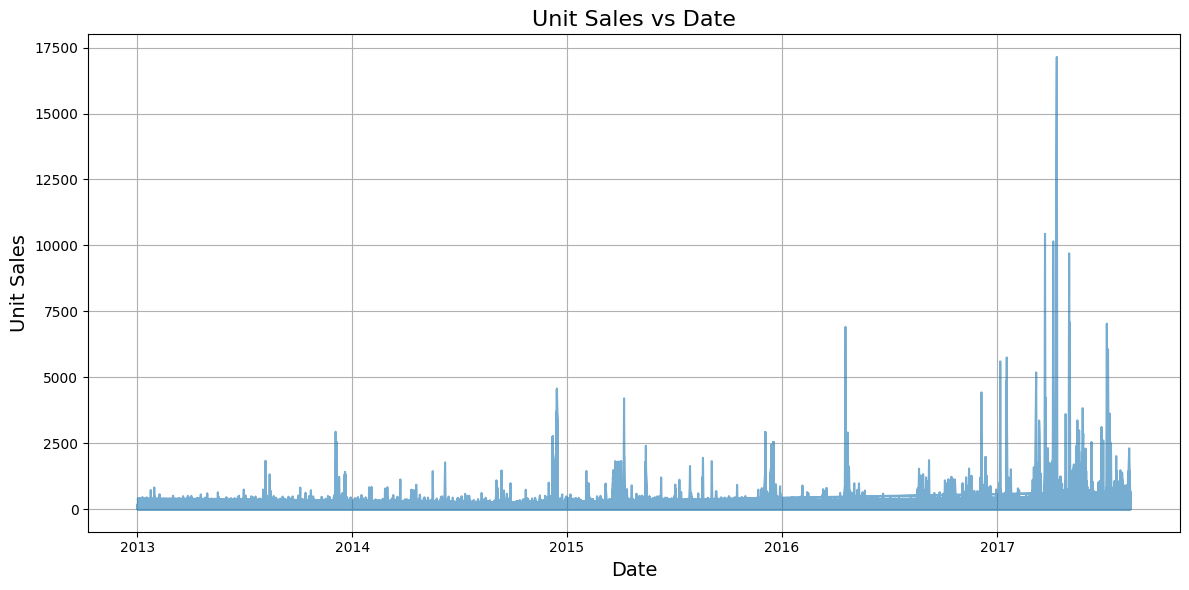

,store_nbr,item_nbr,date,id,unit_sales,onpromotion
0,24,105574,2013-01-02,18790.0,12.0,0.0
1,24,105574,2013-01-03,59692.0,1.0,0.0
2,24,105574,2013-01-04,99664.0,3.0,0.0
3,24,105574,2013-01-05,140805.0,4.0,0.0
4,24,105574,2013-01-06,182800.0,7.0,0.0


In [38]:
# Merge with original data to fill missing dates
df_filled = all_combinations.merge(df_train, on=['store_nbr', 'item_nbr', 'date'], how='left')

# Fill missing sales values with 0
df_filled['unit_sales'] = df_filled['unit_sales'].fillna(0)

# Check the first few rows
print('The filled shape is',df_filled.shape)

# plot unit_sales vs date
plt.figure(figsize=(12, 6))
plt.plot(df_filled['date'], df_filled['unit_sales'], alpha=0.6)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Unit Sales', fontsize=14)
plt.title('Unit Sales vs Date', fontsize=16)
plt.grid(True)
plt.tight_layout()
plt.show()
df_filled.head(5)


In [47]:
print('unique count\n',df_filled.nunique())
print('shape\n',df_filled.shape)
print('null value\n',df_filled.isnull().sum())

unique count
 store_nbr            11
item_nbr           2323
date               1687
id             14745768
unit_sales         4467
onpromotion           2
dtype: int64
shape
 (35069356, 6)
null value
 store_nbr             0
item_nbr              0
date                  0
id             20323588
unit_sales            0
onpromotion    20323588
dtype: int64


In [45]:
zero_sales=df_filled[df_filled['unit_sales']==0]
zero_sales

,store_nbr,item_nbr,date,id,unit_sales,onpromotion
22,24,105574,2013-01-24,NaN,0.0,NaN
34,24,105574,2013-02-05,NaN,0.0,NaN
39,24,105574,2013-02-10,NaN,0.0,NaN
40,24,105574,2013-02-11,NaN,0.0,NaN
41,24,105574,2013-02-12,NaN,0.0,NaN
...,...,...,...,...,...,...
35069350,51,2123791,2017-08-10,NaN,0.0,NaN
35069351,51,2123791,2017-08-11,NaN,0.0,NaN
35069352,51,2123791,2017-08-12,NaN,0.0,NaN
35069353,51,2123791,2017-08-13,NaN,0.0,NaN


## 5. **Feature Engineering**

Now we have all dates and corresponding sales for them. Let's replace the original dataframe:

In [48]:
df_train = df_filled
del df_filled

In [49]:
# Convert date column to datetime
df_train['date'] = pd.to_datetime(df_train['date'])

# Creating new time-based features
df_train['year'] = df_train['date'].dt.year
df_train['month'] = df_train['date'].dt.month
df_train['day'] = df_train['date'].dt.day
df_train['day_of_week'] = df_train['date'].dt.dayofweek

In [54]:
# Calculating rolling average of unit_sales 7 days
df_train['unit_sales_7d_avg'] = df_train.groupby(['item_nbr', 'store_nbr'])['unit_sales'].transform(lambda x: x.rolling(window=7).mean())
# Calculating rolling average of unit_sales 30 days
df_train['unit_sales_30d_avg'] = df_train.groupby(['item_nbr', 'store_nbr'])['unit_sales'].transform(lambda x: x.rolling(window=30).mean())
df_train.tail(10)

,store_nbr,item_nbr,date,id,unit_sales,onpromotion,year,month,day,day_of_week,unit_sales_7d_avg,unit_sales_30d_avg
35069346,51,2123791,2017-08-06,NaN,0.0,NaN,2017,8,6,6,0.000000,0.000000
35069347,51,2123791,2017-08-07,NaN,0.0,NaN,2017,8,7,0,0.000000,0.000000
35069348,51,2123791,2017-08-08,NaN,0.0,NaN,2017,8,8,1,0.000000,0.000000
35069349,51,2123791,2017-08-09,NaN,0.0,NaN,2017,8,9,2,0.000000,0.000000
35069350,51,2123791,2017-08-10,NaN,0.0,NaN,2017,8,10,3,0.000000,0.000000
35069351,51,2123791,2017-08-11,NaN,0.0,NaN,2017,8,11,4,0.000000,0.000000
35069352,51,2123791,2017-08-12,NaN,0.0,NaN,2017,8,12,5,0.000000,0.000000
35069353,51,2123791,2017-08-13,NaN,0.0,NaN,2017,8,13,6,0.000000,0.000000
35069354,51,2123791,2017-08-14,NaN,0.0,NaN,2017,8,14,0,0.000000,0.000000
35069355,51,2123791,2017-08-15,125491523.0,1.0,0.0,2017,8,15,1,0.142857,0.033333


# **Exploratory Data Analysis (EDA)**

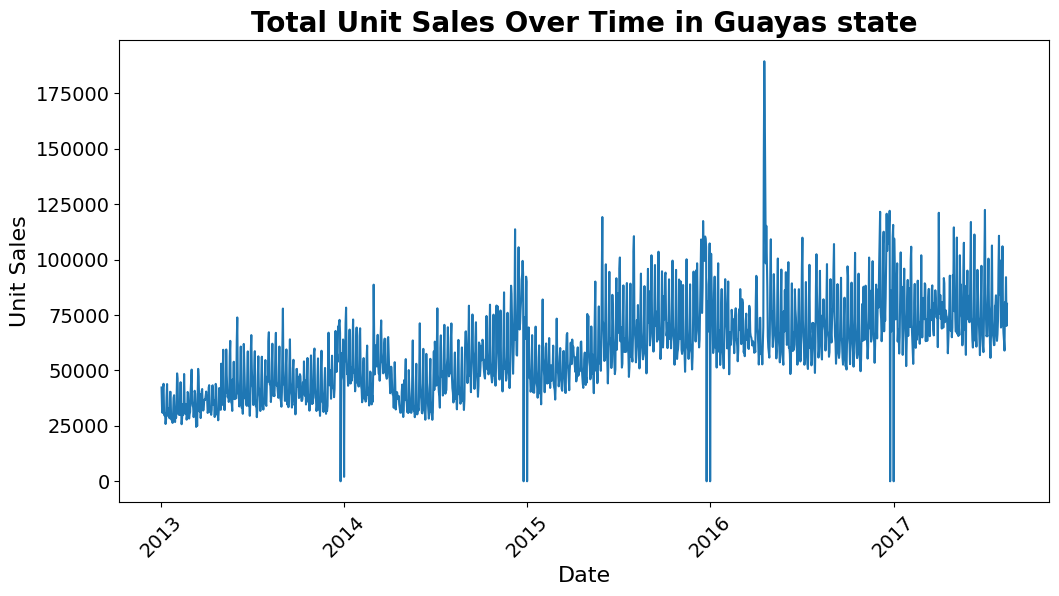

In [52]:
# Aggregating total sales by date
sales_by_date = df_train.groupby('date')['unit_sales'].sum()

# Plotting the time-series
plt.figure(figsize=(12,6))
plt.plot(sales_by_date.index, sales_by_date.values)
plt.title('Total Unit Sales Over Time in Guayas state', fontsize=20, fontweight='bold')
plt.xlabel('Date', fontsize=16)
plt.ylabel('Unit Sales', fontsize=16)
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)
plt.show()

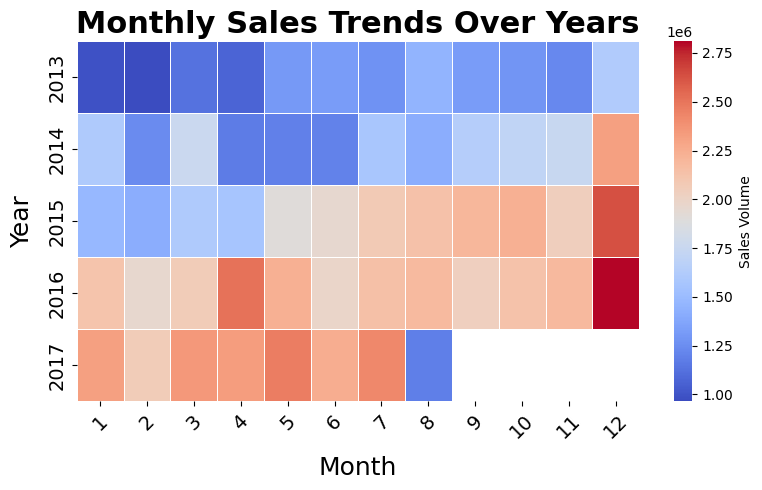

In [62]:
# Aggregating sales by year and month
sales_by_month = df_train.groupby(['year', 'month'])['unit_sales'].sum().unstack()

# Plotting heatmap of sales by year and month
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))  # Increase figure size for better visibility
sns.heatmap(
    sales_by_month,
    cmap='coolwarm',  # Use a diverging colormap for better contrast
    linewidths=0.5,  # Add lines between cells for clarity
    linecolor='white',  # Use white lines for a cleaner look
    cbar_kws={'label': 'Sales Volume'}  # Add a descriptive colorbar label
)

# Customizing title and axes labels
plt.title('Monthly Sales Trends Over Years', fontsize=22, fontweight='bold')
plt.xlabel('Month', fontsize=18, labelpad=10)  # Labelpad adds spacing
plt.ylabel('Year', fontsize=18, labelpad=10)

# Formatting tick labels
plt.xticks(fontsize=14, rotation=45)  # Rotate x-axis labels for better readability
plt.yticks(fontsize=14)

# Adjust layout for better spacing
plt.tight_layout()

# Display the heatmap
plt.show()

Impact of Holidays

In [64]:
# Convert date column to datetime
df_holiday['date'] = pd.to_datetime(df_holiday['date'])
print("Holidays range: from",df_holiday['date'].dt.date.min(),"till",df_holiday['date'].dt.date.max())

Holidays range: from 2012-03-02 till 2017-12-26


In [65]:
df_train_no_zero_sales = df_train[df_train['unit_sales'] > 0]

In [66]:
# Merging df_train with zero sales with data with holidays
df_train_holiday = pd.merge(df_train_no_zero_sales, df_holiday, on='date', how='left')

In [67]:
df_train_holiday

,store_nbr,item_nbr,date,id,unit_sales,onpromotion,year,month,day,day_of_week,unit_sales_7d_avg,unit_sales_30d_avg,type,locale,locale_name,description,transferred
0,24,105574,2013-01-02,18790.0,12.0,0.0,2013,1,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,24,105574,2013-01-03,59692.0,1.0,0.0,2013,1,3,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,24,105574,2013-01-04,99664.0,3.0,0.0,2013,1,4,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,24,105574,2013-01-05,140805.0,4.0,0.0,2013,1,5,5,NaN,NaN,Work Day,National,Ecuador,Recupero puente Navidad,False
4,24,105574,2013-01-06,182800.0,7.0,0.0,2013,1,6,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15032306,29,2122868,2017-08-15,125447370.0,1.0,0.0,2017,8,15,1,0.142857,0.033333,Holiday,Local,Riobamba,Fundacion de Riobamba,False
15032307,29,2123839,2017-08-15,125447372.0,6.0,0.0,2017,8,15,1,0.857143,0.200000,Holiday,Local,Riobamba,Fundacion de Riobamba,False
15032308,51,2123750,2017-08-15,125491521.0,3.0,0.0,2017,8,15,1,0.428571,0.100000,Holiday,Local,Riobamba,Fundacion de Riobamba,False
15032309,51,2123775,2017-08-15,125491522.0,1.0,0.0,2017,8,15,1,0.142857,0.033333,Holiday,Local,Riobamba,Fundacion de Riobamba,False


In [68]:
df_train_holiday.isnull().sum()

store_nbr                    0
item_nbr                     0
date                         0
id                           0
unit_sales                   0
onpromotion                  0
year                         0
month                        0
day                          0
day_of_week                  0
unit_sales_7d_avg        29995
unit_sales_30d_avg      143269
type                  12488638
locale                12488638
locale_name           12488638
description           12488638
transferred           12488638
dtype: int64

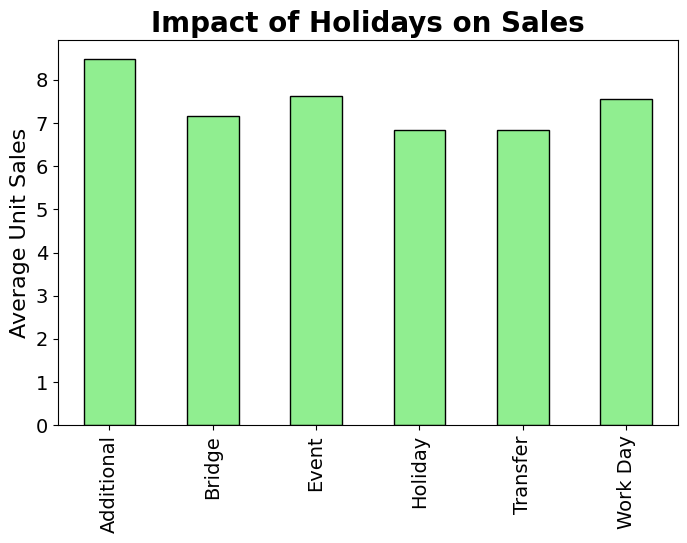

In [69]:
# Aggregating sales by holiday and non-holiday
holiday_sales = df_train_holiday.groupby('type')['unit_sales'].mean()

# Plotting holiday impact
plt.figure(figsize=(8,5))
holiday_sales.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Impact of Holidays on Sales', fontsize=20, fontweight='bold')
plt.ylabel('Average Unit Sales', fontsize=16)
plt.xlabel('')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()